# Class 5: Array computations

Today we will focus on array computations which are particularly useful for processing images. 

## Notes on the class Jupyter setup

If you have the *ydata123_2024a* environment set up correctly, you can get the class code using the code below (which presumably you've already done given that you are seeing this notebook).  

In [1]:
import YData

# YData.download.download_class_code(5)   # get class 5 code    

# YData.download.download_class_code(5, True)  # get the code with the answers 

There are also similar functions to download the homework:

In [2]:
# YData.download.download_homework(2)  # downloads the second homework 

If you are using colabs, you should install polars and the YData packages by uncommenting and running the code below.

In [3]:
# !pip install https://github.com/emeyers/YData_package/tarball/master

If you are using google colabs, you should also uncomment and run the code below to mount the your google drive

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

## Review: Creating Arrays

Often we want to process data that is all of the same type. For example, we might want to do processing on a data set of numbers (e.g., if we were just analyzing salary data). 

When we have data that is all of the same type, there are faster ways to process data than using a list. In Python, the `numpy` package offers ways to store and process data that is all of the same type using a data structure called a `ndarray`. There are also functions that operate on `ndarrays` that can do computations very efficiently. 

Let's explore this now!

In [5]:
# import the numpy package
import numpy as np

import matplotlib.pyplot as plt


In [6]:
# create an ndarry of numbers
a_list = [2, 3, 4, 5]
an_array = np.array(a_list)

an_array

array([2, 3, 4, 5])

In [7]:
# we can get the type of elements in an array by accessing the dtype property
an_array.dtype

dtype('int64')

In [8]:
# get the size of the array
an_array.shape

(4,)

In [9]:
# create a boolean array
boolean_array = np.array([True, True, False])
boolean_array

array([ True,  True, False])

In [10]:
# get the type in the boolean array
boolean_array.dtype

dtype('bool')

In [11]:
# reversing True's and Falses
~boolean_array

array([False, False,  True])

In [12]:
# what happens if we make an array from a list of mixed values
mixed_array = np.array([1, 2, "three"])
mixed_array

array(['1', '2', 'three'], dtype='<U21')

In [13]:
# get the dtype 
mixed_array.dtype

dtype('<U21')

In [14]:
mixed_array[0]

'1'

In [15]:
type(mixed_array[0])

numpy.str_

In [16]:
mixed_array[0] == 1

False

In [17]:
mixed_array[0] == '1'

True

In [18]:
# create sequential numbers 1 to 9
sequential_nums = np.arange(1, 10)      


In [19]:
# convert types
my_strings = np.array(["1", "2", "3"])
print(my_strings.dtype)

my_numbers = my_strings.astype("int")
print(my_numbers.dtype)

<U1
int64


## NumPy functions on numerical arrays

The NumPy package has a number of functions that operate very efficiently on numerical ndarrays.

Let's explore these functions by looking at the price of gas!

The data comes from: https://www.eia.gov/opendata/v1/qb.php?category=240692&sdid=PET.EMM_EPM0_PTE_NUS_DPG.W

In [20]:
# download the data
YData.download.download_data('US_Gasoline_Prices_Weekly.csv')

The file `US_Gasoline_Prices_Weekly.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


In [21]:
# read in and view the data
import pandas as pd
gas_data = pd.read_csv("US_Gasoline_Prices_Weekly.csv", parse_dates=[0])  # load in the data
gas_data.head()

,Week,DollarsPerGallon
0,2024-01-15,3.058
1,2024-01-08,3.073
2,2024-01-01,3.089
3,2023-12-25,3.116
4,2023-12-18,3.053


In [22]:
# Get an ndarray of the gas prices from each week of 2023
# You can ignore this code for now...

gas_data_2023 = gas_data[(gas_data['Week'] > '2023-01-01') & (gas_data['Week'] < '2024-01-01')] 

gas_prices_2023 = gas_data_2023["DollarsPerGallon"].values
gas_dates_2023 = gas_data_2023["Week"].values


In [23]:
# prices for all 52 weeks in 2022
gas_prices_2023.shape   

(52,)

In [24]:
# One dollar is currently 147 Yen. What has been the price of a gallon of gas cost in Yen? 
# What have gas prices been in Euros? 
gas_prices_2023 * 147

array([458.052, 448.791, 460.992, 474.957, 475.986, 483.483, 492.303,
       499.212, 510.531, 519.351, 525.672, 541.548, 558.306, 564.039,
       570.066, 561.834, 559.629, 560.511, 568.596, 565.95 , 562.716,
       552.279, 528.612, 523.173, 521.262, 518.469, 524.937, 525.819,
       528.465, 520.527, 524.937, 519.498, 519.792, 519.351, 529.2  ,
       537.432, 538.461, 528.612, 514.059, 502.887, 503.034, 508.032,
       498.183, 491.274, 496.713, 498.33 , 506.268, 512.883, 502.005,
       486.57 , 479.073, 473.781])

In [25]:
# what if there was a constant tax of $2 on each gallon purchased? 
gas_prices_2023 + 2

array([5.116, 5.053, 5.136, 5.231, 5.238, 5.289, 5.349, 5.396, 5.473,
       5.533, 5.576, 5.684, 5.798, 5.837, 5.878, 5.822, 5.807, 5.813,
       5.868, 5.85 , 5.828, 5.757, 5.596, 5.559, 5.546, 5.527, 5.571,
       5.577, 5.595, 5.541, 5.571, 5.534, 5.536, 5.533, 5.6  , 5.656,
       5.663, 5.596, 5.497, 5.421, 5.422, 5.456, 5.389, 5.342, 5.379,
       5.39 , 5.444, 5.489, 5.415, 5.31 , 5.259, 5.223])

In [26]:
# basic functions of: min, max, etc.
print([np.min(gas_prices_2023), np.max(gas_prices_2023)])

[3.053, 3.878]


In [27]:
# if you bought one gallon each week, what would you pay over the whole year? 
print(np.sum(gas_prices_2023))  

182.969


In [28]:
# what do you pay on average? 
print(np.mean(gas_prices_2023))
print(np.median(gas_prices_2023))

3.5186346153846153
3.5335


In [29]:
# If you bought one gallon each week, how much would you pay at the end of each of the weeks of the year? 
np.cumsum(gas_prices_2023)

array([  3.116,   6.169,   9.305,  12.536,  15.774,  19.063,  22.412,
        25.808,  29.281,  32.814,  36.39 ,  40.074,  43.872,  47.709,
        51.587,  55.409,  59.216,  63.029,  66.897,  70.747,  74.575,
        78.332,  81.928,  85.487,  89.033,  92.56 ,  96.131,  99.708,
       103.303, 106.844, 110.415, 113.949, 117.485, 121.018, 124.618,
       128.274, 131.937, 135.533, 139.03 , 142.451, 145.873, 149.329,
       152.718, 156.06 , 159.439, 162.829, 166.273, 169.762, 173.177,
       176.487, 179.746, 182.969])

In [30]:
# How much does the gas price go up and down each week? 
np.diff(gas_prices_2023)

array([-0.063,  0.083,  0.095,  0.007,  0.051,  0.06 ,  0.047,  0.077,
        0.06 ,  0.043,  0.108,  0.114,  0.039,  0.041, -0.056, -0.015,
        0.006,  0.055, -0.018, -0.022, -0.071, -0.161, -0.037, -0.013,
       -0.019,  0.044,  0.006,  0.018, -0.054,  0.03 , -0.037,  0.002,
       -0.003,  0.067,  0.056,  0.007, -0.067, -0.099, -0.076,  0.001,
        0.034, -0.067, -0.047,  0.037,  0.011,  0.054,  0.045, -0.074,
       -0.105, -0.051, -0.036])

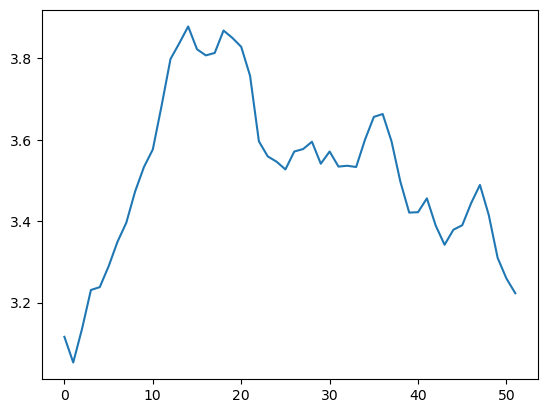

In [31]:
# plot the gas prices
plt.plot(gas_prices_2023);  

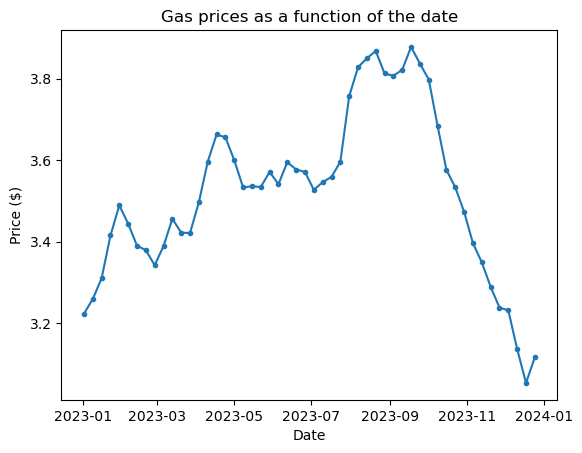

In [32]:
# plot the gas prices better!
plt.plot(gas_dates_2023, gas_prices_2023, '.-');  
plt.xlabel("Date");
plt.ylabel("Price ($)")
plt.title("Gas prices as a function of the date");

<br>
<br>
<br>
<p>
<center><img src=https://cdn.quotesgram.com/img/69/59/1803591020-high-gas-prices.jpg></center>

## Boolean arrays

We can easily compare all values in an ndarray to a particular value. The result will return an ndarray of Booleans. 

Since Boolean `True` values are treated as 1's, and Boolean `False` values are treated as 0's, this makes it easy to see how many values in an array meet particular conditions. 

In [33]:
# Test all values in an array that are less than 5
my_array = np.array([12, 4, 6, 3, 4, 3, 7, 4])
my_array < 5

array([False,  True, False,  True,  True,  True, False,  True])

In [34]:
# How many values are less than 5.
np.sum(my_array < 5)

5

In [35]:
# How many (and what proportion) of weeks in 2023 were gas prices were below $3.50?
np.sum(gas_prices_2023 < 3.50)

23

### What proportion of NBA players are centers? 

The data from the 2022-2023 season is loaded below and ndarrays for players positions and salaries are created. 

See if you can use this data to calculate the proportion of NBA players that are centers using numpy!

In [36]:
# download the data
import YData
YData.download.download_data("nba_salaries_2022_23.csv")

The file `nba_salaries_2022_23.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


In [37]:
# Load the NBA data as a pandas data frame
import pandas as pd
nba = pd.read_csv("nba_salaries_2022_23.csv")  # load in the data
nba.head()

# Extract ndarrays for salary and position 
salary_array = nba["SALARY"].values
position_array = nba["POSITION"].values
team_array = nba["TEAM"].values
player_array = nba["PLAYER"].values

print(salary_array[0:5])
print(position_array[0:5])


[ 9.835881  2.79264   3.53616   0.508891 23.5     ]
['SF' 'SF' 'SF' 'SG' 'PF']


In [38]:
# get the proportion of players that are centers
boolean_centers = position_array == "C"

print(np.sum(boolean_centers)/len(boolean_centers))

# equivalently we can use the np.mean() funciton 
np.mean(boolean_centers)

0.1948608137044968


0.1948608137044968

## Boolean indexing/masking

We can also use Boolean arrays to return values in another array. This is called "Boolean masking" or "Boolean indexing".


In [39]:
my_array = np.array([12, 4, 6, 3, 4, 3, 7, 4])
my_array < 5    

array([False,  True, False,  True,  True,  True, False,  True])

In [40]:
# Calculate the average salary of NBA centers

centers_salaries = salary_array[boolean_centers]
print(len(centers_salaries))

np.mean(centers_salaries)

91


7.282722109890111

In [41]:
# Do the other positions have higher average salaries compared to centers? 
# Calculate the average salary of all players who are not Centers

not_centers_salaries = salary_array[~boolean_centers]

np.mean(not_centers_salaries)


8.691021018617022

In [42]:
# What are the salaries for centers on the Celtics? 

boolean_celtics = team_array == "Boston Celtics"
boolean_celtics_and_centers = boolean_celtics * boolean_centers

# print the number of players that are centers on the celtics
print(sum(boolean_celtics_and_centers))

# check who they are
print(player_array[boolean_celtics_and_centers])

# get their salaries
salary_array[boolean_celtics_and_centers]


6
['Mike Muscala' 'Robert Williams' 'Al Horford' 'Noah Vonleh'
 'Blake Griffin' 'Luke Kornet']


array([ 3.5     , 10.714287, 26.5     ,  1.160955,  2.905851,  2.133278])

## Higher dimensional arrays

In [43]:
my_matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
my_matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [44]:
# slicing to get a submatrix 
my_matrix[0:2, 0:2]   # like array slicing, it does return a value at the end index

array([[1, 2],
       [4, 5]])

In [45]:
my_matrix2 = my_matrix.copy()  # copy the matrix
my_matrix2[0:2, 0:2] = 100  # set particular index values to 100

my_matrix2

array([[100, 100,   3],
       [100, 100,   6],
       [  7,   8,   9]])

In [46]:
# sum all the values
print(np.sum(my_matrix))

45


In [47]:
# sum down the rows 
np.sum(my_matrix, axis = 0)

array([12, 15, 18])

In [48]:
# sum across the columns
np.sum(my_matrix, axis = 1)

array([ 6, 15, 24])

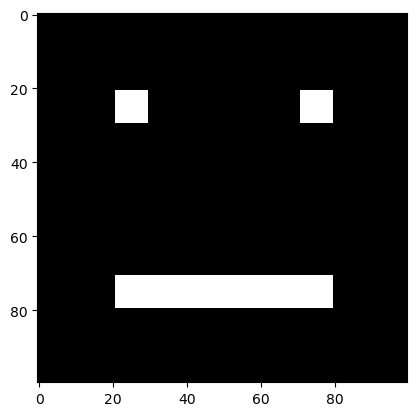

In [49]:
# what does the following do? 

face_array = np.zeros([100, 100])  # create a matrix of all 0's 

face_array[21:30, 21:30] = 1  # assign particular regions the value of 1
face_array[21:30, 71:80] = 1
face_array[71:80, 21:80] = 1

plt.imshow(face_array, cmap = 'gray');
#plt.colorbar();

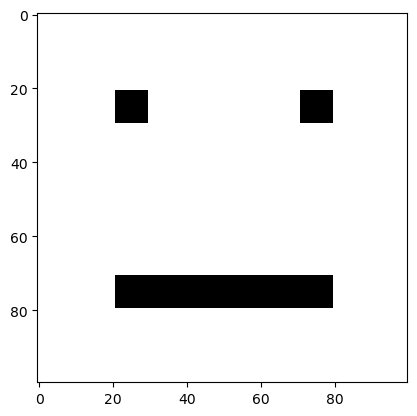

In [50]:
# convert face_array to a boolean matrix
face_array = face_array.astype("bool")
plt.imshow(~face_array, cmap = 'gray');

## Image processing

We can use numerical arrays (and NumPy) to do image processing. Let's explre this now.

In [51]:
# download an image of a famous Yale alumni
YData.download.download_image("burns.jpeg")

The file `burns.jpeg` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


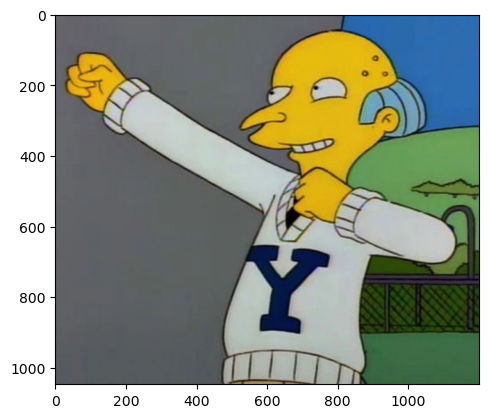

In [52]:
# load in an image 

from imageio.v3 import imread

I = imread("burns.jpeg")

plt.imshow(I);

In [53]:
# get the type and shape of the image
print(I.dtype)
I.shape

uint8


(1047, 1200, 3)

(1047, 1200, 3)
float64


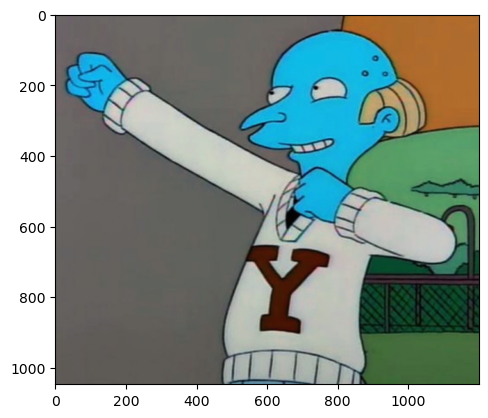

In [54]:
# Let's reverse the red and blue channels

r_channel = I[:, :, 0]
g_channel = I[:, :, 1]
b_channel = I[:, :, 2]

# create new image where color channels will be swapped
rev_rb = np.zeros(I.shape)
print(rev_rb.shape)

# swap channels
rev_rb[:, :, 0] = b_channel
rev_rb[:, :, 1] = g_channel
rev_rb[:, :, 2] = r_channel

# convert to ints
print(rev_rb.dtype)
rev_rb = rev_rb.astype("int")

# display the image
plt.imshow(rev_rb);

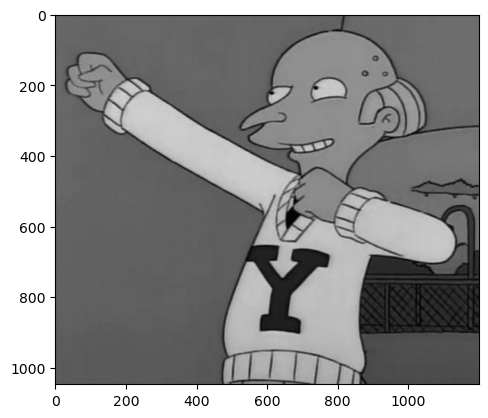

In [74]:
# To create a grayscale image - use the average value in all three r, g, b channels

mean_image = np.mean(I, axis = 2)

plt.imshow(gray_image, cmap='gray');

(1047, 1200, 3)


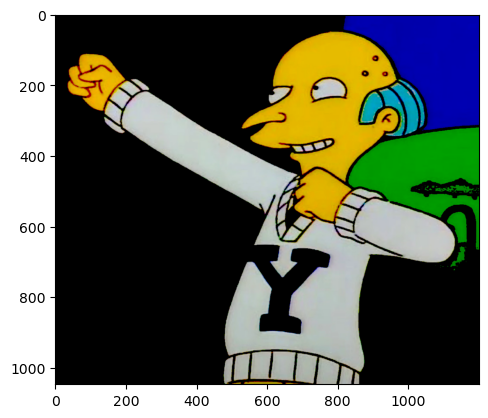

In [56]:
# Image masking - make all drak pixels even darker (set to a value of 0)

darken = I.copy()
darken_mask = darken < 128
print(darken_mask.shape)

darken[darken_mask] = 0
plt.imshow(darken);

## Pandas 

pandas Series are: 0ne-dimensional ndarray with axis labels

pands DataFrame are: Table data

Let's look at the egg and wheat price data...


In [57]:
YData.download.download_data("monthly_egg_prices.csv");
YData.download.download_data("dow.csv");

The file `monthly_egg_prices.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `dow.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


In [85]:
# reading in a series by parsing the dates, and using .squeeze() to conver to a Series
egg_prices_series = pd.read_csv("monthly_egg_prices.csv", parse_dates=True, date_format="%m/%d/%y", index_col="DATE").squeeze()


# print the type
print(type(egg_prices_series))

# print the shape
print(egg_prices_series.shape)

# print the series
egg_prices_series


<class 'pandas.core.series.Series'>
(528,)


DATE
1980-01-01    0.879
1980-02-01    0.774
1980-03-01    0.812
1980-04-01    0.797
1980-05-01    0.737
              ...  
2023-08-01    2.043
2023-09-01    2.065
2023-10-01    2.072
2023-11-01    2.138
2023-12-01    2.507
Name: Price, Length: 528, dtype: float64

In [59]:
# get a value from the Series by an Index name using .loc
egg_prices_series.loc["1980-01-01"]

0.879

In [60]:
# get a value from the Series by index number using .iloc
egg_prices_series.iloc[0]

0.879

In [61]:
# use the .filter() method to get data from dates that contain "2023"
egg_prices_2023 = egg_prices_series.filter(like='2023')

# print the length 
print(len(egg_prices_2023))

egg_prices_2023

12


DATE
2023-01-01    4.823
2023-02-01    4.211
2023-03-01    3.446
2023-04-01    3.270
2023-05-01    2.666
2023-06-01    2.219
2023-07-01    2.094
2023-08-01    2.043
2023-09-01    2.065
2023-10-01    2.072
2023-11-01    2.138
2023-12-01    2.507
Name: Price, dtype: float64

In [62]:
# turn the index back into a column using .reset_index()
egg_prices_df = egg_prices_series.reset_index()

# get the type
print(type(egg_prices_df))

# print the values
egg_prices_df


<class 'pandas.core.frame.DataFrame'>


,DATE,Price
0,1980-01-01,0.879
1,1980-02-01,0.774
2,1980-03-01,0.812
3,1980-04-01,0.797
4,1980-05-01,0.737
...,...,...
523,2023-08-01,2.043
524,2023-09-01,2.065
525,2023-10-01,2.072
526,2023-11-01,2.138


## DataFrames!

The ability to manipulate data in tables is one of the most useful skills in Data Science. 

Pandas is the most popular package in Python for manipulating data tables so we will use this package for manipulating tables in this class. The syntax for Pandas can be a little tricky, so try to be patient if you run into errors, and as always, there should be plenty of help available at office hours and on Ed. 

As an example, let's look at data on the closing price of the [Dow Jones Industrial Average](https://www.marketwatch.com/investing/index/djia) which is an index of the prices of the 30 largest corporations in the US.

The code below loads the DOW data into a Pandas DataFrame and displays the first 5 rows using the `head()` method. 


In [63]:
dow = pd.read_csv("dow.csv", parse_dates=True)  # parsing the dates didn't work

dow.head()

,Date,Year,Month,Day,Open,High,Low,Close
0,1/25/23,2023,1,Wednesday,33538.36,33773.09,33273.21,33743.84
1,1/24/23,2023,1,Tuesday,33444.72,33782.92,33310.56,33733.96
2,1/23/23,2023,1,Monday,33439.56,33782.88,33316.25,33629.56
3,1/20/23,2023,1,Friday,33073.46,33381.95,32948.93,33375.49
4,1/19/23,2023,1,Thursday,33171.35,33227.49,32982.05,33044.56


In [64]:
# The head() method returns the first 5 rows. 
# Let's use the tail() method to get the last 5 rows.
# From looking at the output, can you tell what year the data goes back until? 

dow.tail()

,Date,Year,Month,Day,Open,High,Low,Close
10663,10/8/80,1980,10,Wednesday,963.98,971.42,955.30,963.98
10664,10/7/80,1980,10,Tuesday,960.67,973.05,955.55,960.67
10665,10/6/80,1980,10,Monday,965.70,969.63,950.84,965.70
10666,10/3/80,1980,10,Friday,950.69,957.84,938.41,950.69
10667,10/2/80,1980,10,Thursday,942.23,948.20,931.31,942.23


In [65]:
# get the number of rows and columns in a DataFrame using the shape property
dow.shape

(10668, 8)

In [66]:
# get the types of all the columns using .dtypes
dow.dtypes

Date      object
Year       int64
Month      int64
Day       object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [67]:
# get the names of all the columns using .columns
print(dow.columns)

# we can convert these names to an numpy array using the .to_numpy() method
dow.columns.to_numpy()

Index(['Date', 'Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Close'], dtype='object')


array(['Date', 'Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Close'],
      dtype=object)

In [68]:
# get more info on the data frame using the .info() method
dow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10668 non-null  object 
 1   Year    10668 non-null  int64  
 2   Month   10668 non-null  int64  
 3   Day     10668 non-null  object 
 4   Open    10668 non-null  float64
 5   High    10668 non-null  float64
 6   Low     10668 non-null  float64
 7   Close   10668 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 666.9+ KB


In [69]:
# get descriptive statistics on DataFrame using the .describe() method

dow.describe().round()   # round() the values, or can convert them to ints using astype("int")

,Year,Month,Open,High,Low,Close
count,10668.0,10668.0,10668.0,10668.0,10668.0,10668.0
mean,2001.0,7.0,10483.0,10563.0,10400.0,10484.0
std,12.0,3.0,8751.0,8797.0,8704.0,8753.0
min,1980.0,1.0,777.0,784.0,770.0,777.0
25%,1991.0,4.0,2921.0,2947.0,2892.0,2921.0
50%,2001.0,7.0,9763.0,9856.0,9661.0,9763.0
75%,2012.0,10.0,13347.0,13465.0,13256.0,13351.0
max,2023.0,12.0,36723.0,36953.0,36636.0,36800.0


More on pandas DataFrames next class!